<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Parametric Distribution Fitting

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Parametric Distribution Fitting**. 

**YouTube Lecture**: check out my lectures on:

* [Parametric Distributions](https://youtu.be/U7fGsqCLPHU?si=JEMq6-FpCrHGt8jB)

This lecture is part of my [Data Analytics and Geostatistics Course](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### General Model Fitting

Using data to infer the parameter distribution parameters is useful to support forecasting and anomality detection. There are multiple methods to accomplish this,

There are two common methods to fit a model, ordinary least squares and maximim likelihood estimation. Here I provide a short description and then demonstrate them together for fitting a parametric Gaussian distribution to a synthetic data set.

First, let's define the model and data.

* The model parameters, $\beta$, are trained to the training data, $X_{\alpha}, \alpha = 1,\ldots,n$.
* In this example the model is a parametric Gaussian distribution; therefore the model parameters are the mean, $\mu$, and standard deviation, $\sigma$.
* For this example, the synthetic data are a limited set of independent samples from an 'unknown' Gaussian distributions; therefore, we expect that our model selection should be reasonable, i.e., the data is somewhat Gaussian distributed.

#### Ordinary Least Squares Fitting

This is a very common method for fitting a model, let's minimize the error between the model predictions and the observations. 

* We calculated the model predictions, $\hat{y}_{\alpha}$, at training data locations, $\alpha = 1,\ldots,n$.  
* Then we compare the model predictions to the true data observations as the squared error, $\Delta y_{\alpha}^2 = \left(\hat{y}_{\alpha} - y_{\alpha} \right)^2$, where the model predictions, $\hat{y}_{\alpha} = \hat{f}_{\beta}(X_{\alpha})$, are estimated with our estimated model parameters, $\hat{f}_{\beta}(X_{\alpha})$.
* We then sum the squared error over all data observations, the sum of squared error (SSE) is $\sum_{\alpha=1}^n \left(\hat{y}_{\alpha} - y_{\alpha} \right)^2$

Now we pose the model parameter estimation problem as an optimization problem to select the model parameters such that we minimize the SSE.

$$
\hat{\beta}^{OLS}= {\text{arg min}}_{\beta} \rightarrow \left(\hat{f}_{\beta}(X_{\alpha}) - y_{\alpha} \right)^2
$$

#### Maximum Likelihood Fitting

This is a different way to approach fitting a model, find the model parameters, $\beta$, that maximizes the probability of the sample data, $X$. 

For the Bayesian approach to machine learning, this is the **likelihood** that is applied to the **prior** to calculate the **posterior**. Under the assumption of data independence we apply the product sum to the probability of each of the data, $X_\alpha = 1,\ldots,n$, given the model:

$$
P(X | \hat{f}_{\beta}) = \prod_{\alpha = 1}^{n} P(X_{\alpha}|\hat{f}_{\beta}(X)), \alpha = 1,\ldots,n
$$

For our maximization it is sufficient to work with likelihoods, the density values directly from the PDF model, $\hat{f}_{\beta}(X_{\alpha})$.

$$
P(X | \hat{f}_{\beta}) = \prod_{\alpha = 1}^{n} \hat{f}_{\beta}(X_{\alpha}), \alpha = 1,\ldots,n
$$

This solution can be very small given a large number of sample data, so we commonly apply the log transform to work with the sum of the log likelihoods and we calculate the negative sum of log likelihoods to convert this to a standard minimization problem.

$$
P(X | \hat{f}_{\beta}(X)) = -\sum_{\alpha = 1}^{n} log \left(\hat{f}_{\beta}(X_{\alpha})\right), \alpha = 1,\ldots,n
$$

Now we pose the model parameter estimation problem as an optimization problem to select the model parameters such that we minimize the negative log likelihood.

$$
\hat{\beta}^{OLS}= {\text{arg min}}_{\beta} \rightarrow P(X | \hat{f}_{\beta}(X))
$$

#### Comparing OLS and MLE Approaches

We calculate the model parameters, such that we:

**OLS**: - minimize the sum of the squared differences between the observed values and the values predicted by the model.

**MLE**: - maximize the likelihood of the observed data given the model.

Both methods assume sufficient sample data, sample data representativity, correct model specification, in adddition:

**OLS**: - assumes that the errors have a mean of zero, constant variance and are independent of eachother (no correlation in error).

#### Interactive Python Dashboard

To demonstrate the parametric distribution fitting, I coded an interactive Python dashboard [OLS and MLE Fitting](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Parametric_Distributions.ipynb).

<figure style="text-align: center;">
  <img src="_static/parametric_fitting/interactive_ols_mle.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Interactive OLS and MLE fitting Python dashboard.</figcaption>
</figure>

#### Importing Packages

We will need some standard packages. These should have been installed with Anaconda 3.

In [3]:
import numpy as np                                        # ndarrys for gridded data
import pandas as pd                                       # DataFrames for tabular data
import os                                                 # set working directory, run executables
import matplotlib.pyplot as plt                           # for plotting
from scipy import stats                                   # summary statistics
import math                                               # trigonometry etc.
import random                                             # for randon numbers

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [5]:
#os.chdir("c:/PGE383")                                    # set the working directory

#### Example Guassian Distribution

Let's now use the Gaussian parametric distribution.

* we assume the parameters, mean and the variance

We will demonstrate the use of the parametric distribution with the forward, $f_x(x)$ and $F_x(x)$, and reverse, $F^{-1}_x(x)$, operations and calculate the summary statistics.

The mean is 0.15.
The variance is 0.0009.


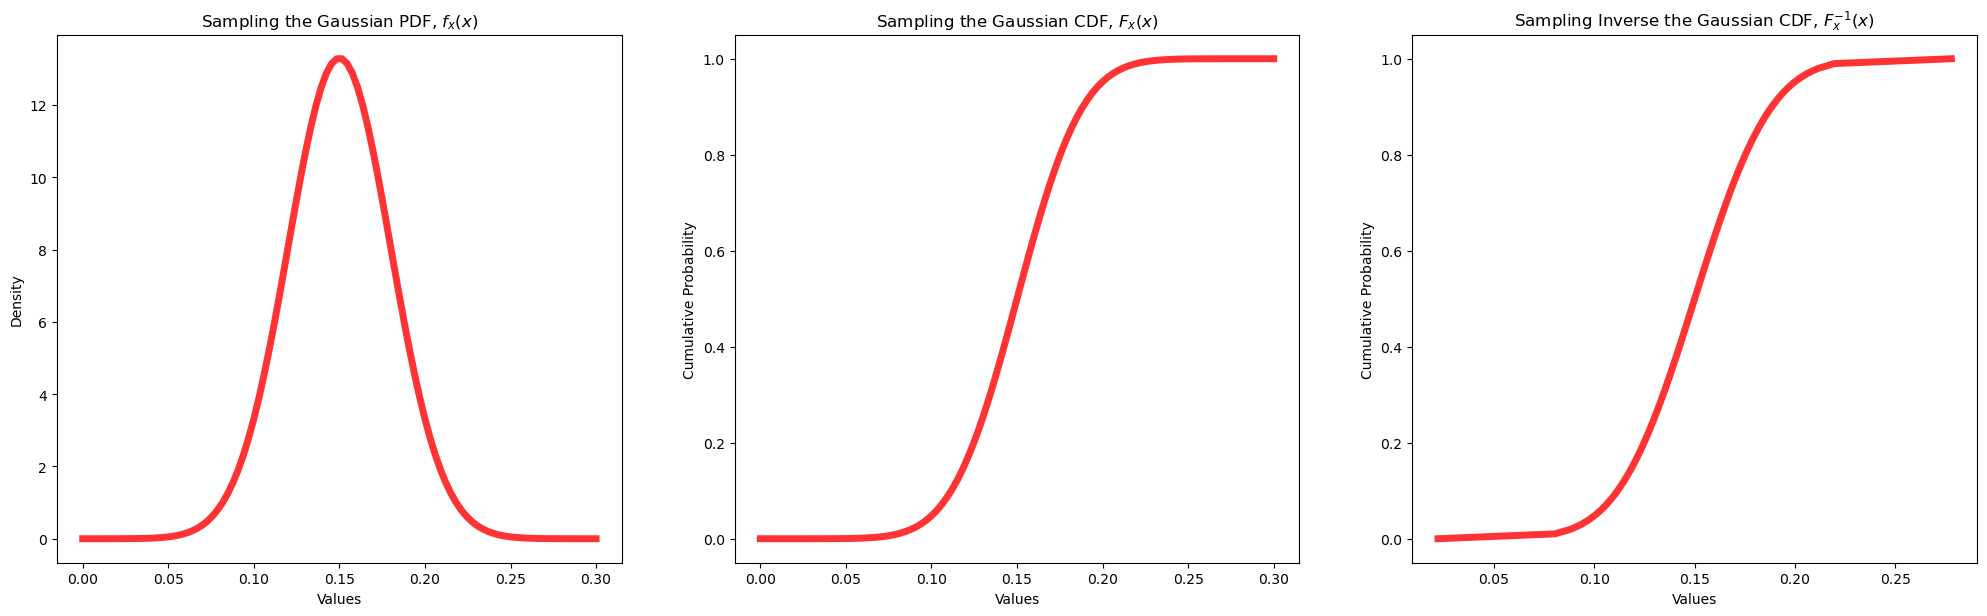

In [9]:
from scipy.stats import norm as my_dist                   # import traingular dist as my_dist
import numpy as np                                        # ndarrys for gridded data
dist_type = 'Gaussian'                                    # give the name of the distribution for labels
mean = 0.15; stdev = 0.03                                 # given the distribution par
x_values = np.linspace(0.0,0.3,100)                       # get an array of x values
p_values = my_dist.pdf(x_values, loc = mean, scale = stdev) # calculate density for each x value
P_values = my_dist.cdf(x_values, loc = mean, scale = stdev) # calculate cumulative probablity for each 
plt.subplot(1,3,1)                                        # plot the resulting PDF

plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' PDF, $f_x(x)$'); plt.xlabel('Values'); plt.ylabel('Density')

plt.subplot(1,3,2)                                        # plot the resulting CDF
plt.plot(x_values, P_values,'r-', lw=5, alpha=0.8); plt.title('Sampling the ' + str(dist_type) + ' CDF, $F_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

p_values = np.linspace(0.00001,0.99999,100)               # get an array of p-values
x_values = my_dist.ppf(p_values, loc = mean, scale = stdev) # apply inverse to get x values from p-values
plt.subplot(1,3,3)
plt.plot(x_values, p_values,'r-', lw=5, alpha=0.8, label='uniform pdf')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.title('Sampling Inverse the ' + str(dist_type) + ' CDF, $F^{-1}_x(x)$'); plt.xlabel('Values'); plt.ylabel('Cumulative Probability')

print('The mean is ' + str(round(my_dist.mean(loc = mean, scale = stdev),4)) + '.') # calculate stats and symmetric interval
print('The variance is ' + str(round(my_dist.var(loc = mean, scale = stdev),4)) + '.')


#### Monte Carlo Sample Dataset

Let's make a random dataset and then fit it with a Gaussian distribution.

* we do $n$ random samples, Monte Carlo simulations, from the Gaussian parametric distribution with parameters $mean$ and $stdev$.

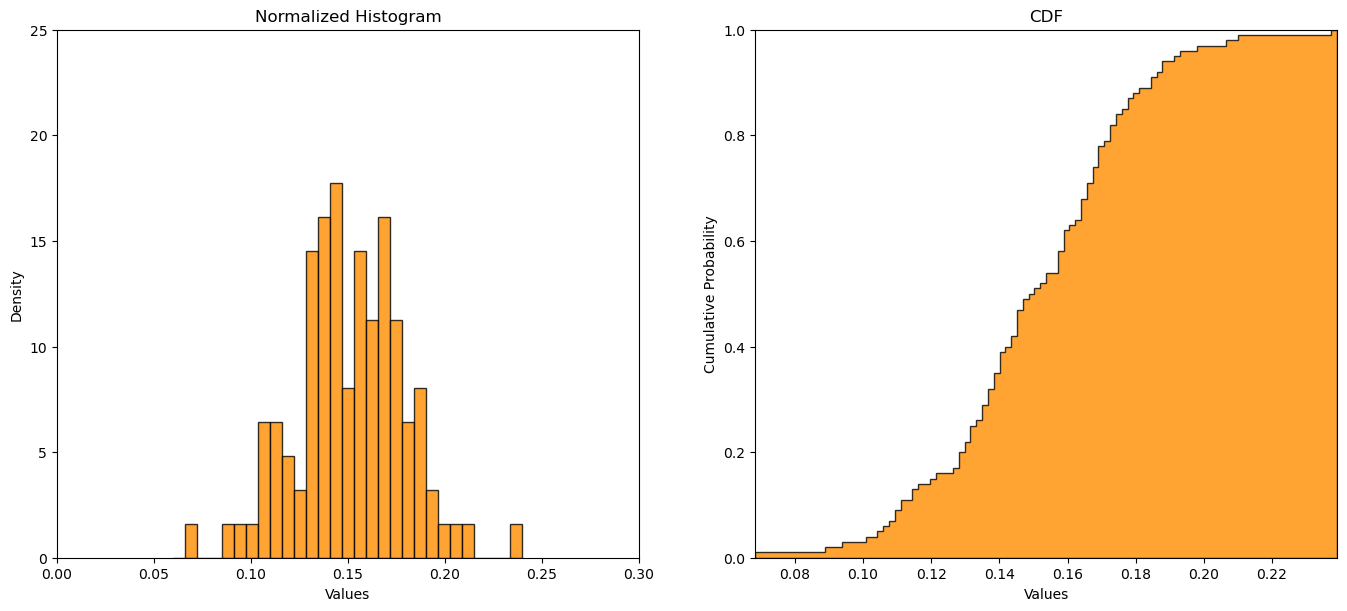

In [12]:
n = 100
samples = my_dist.rvs(size=int(n), loc = mean, scale = stdev, random_state = 73073).tolist() # make a synthetic dataset

plt.subplot(1,2,1)                                        # plot the binned PDF
plt.hist(samples,bins = np.linspace(mean-3*stdev,mean+3*stdev,30), density = True, color = 'darkorange', edgecolor = 'black', alpha = 0.8)
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Normalized Histogram')
 
plt.subplot(1,2,2)                                        # plot the CDF
plt.hist(samples, bins = len(samples), density = True, color = 'darkorange', edgecolor = 'black', cumulative = True, histtype = 'stepfilled',alpha = 0.8)
plt.xlim([np.min(samples),np.max(samples)]); plt.ylim(0,1); plt.xlabel('Values'); plt.ylabel('Cumulative Probability'); plt.title('CDF')
 
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3)

#### Maximum Likelihood Estimation 

Now we can fit a Gaussian parametric distribution to our dataset by maximum likelihood estimation.

MLE mean = 0.151, MLE standard deviation = 0.028


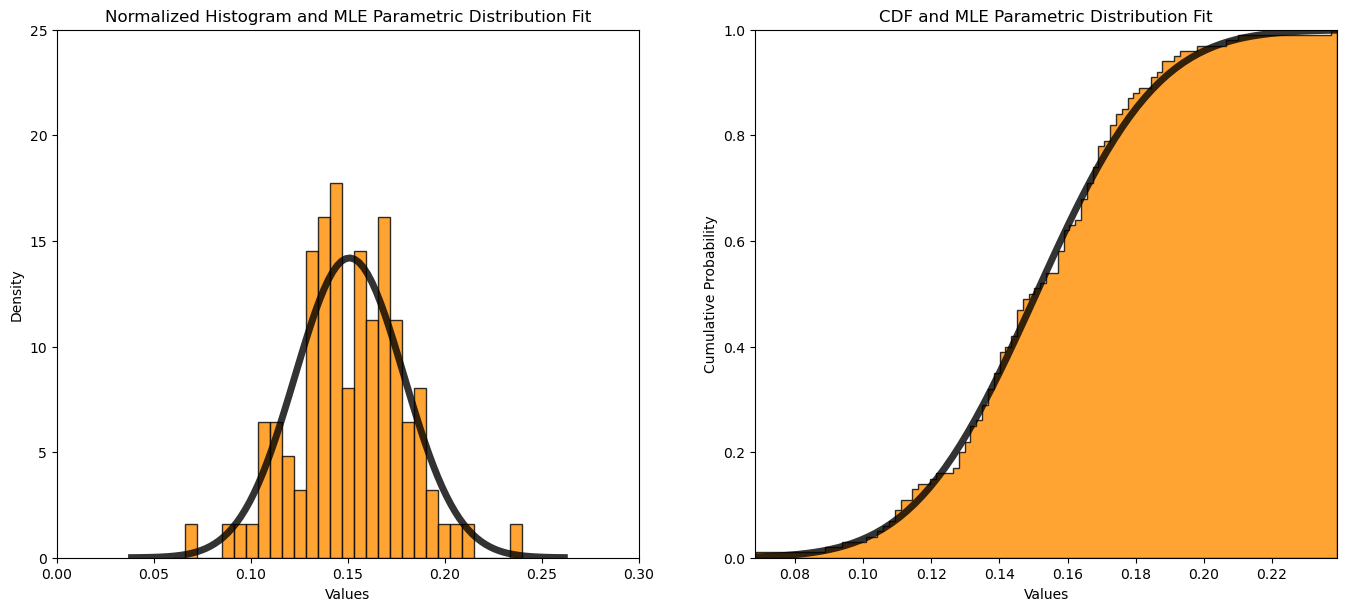

In [14]:
plt.subplot(1,2,1)                                        # plot the binned PDF
plt.hist(samples,bins = np.linspace(mean-3*stdev,mean+3*stdev,30), density = True, color = 'darkorange', edgecolor = 'black', alpha = 0.8)
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Normalized Histogram and MLE Parametric Distribution Fit')
 
x = np.linspace(my_dist.ppf(0.0001, loc = mean, scale = stdev),my_dist.ppf(0.9999, loc = mean, scale = stdev), 100)

fit_mean, fit_stdev = my_dist.fit(samples,loc = mean, scale = stdev) # fit MLE of the distribution parameters
print('MLE mean = ' + str(round(fit_mean,3)) + ', MLE standard deviation = ' + str(round(fit_stdev,3)))

plt.plot(x, my_dist.pdf(x, loc = fit_mean, scale = fit_stdev), 'black', lw=5, alpha=0.8, label='norm pdf')
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density')

plt.subplot(1,2,2)                                        # plot the binned PDF with the fit parametric distribution
plt.hist(samples, bins = len(samples), density = True, color = 'darkorange', edgecolor = 'black', cumulative = True, histtype = 'stepfilled',alpha = 0.8)
plt.xlim([np.min(samples),np.max(samples)]); plt.ylim(0,1); plt.xlabel('Values'); plt.ylabel('Cumulative Probability'); plt.title('CDF and MLE Parametric Distribution Fit')
                                                                    
plt.plot(x, my_dist.cdf(x, loc = fit_mean, scale = fit_stdev), 'black', lw=5, alpha=0.8, label='norm pdf') # plot the CDF with the fit parametric distribution

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3)

#### Calculating the Parameters from the Data

What if we just calculate the mean and standard deviation from the sample data to use as our 'fit' parametric distribution?

* this may work well if there are no outliers, e.g., if there are a couple very high values the mean would shift up and the over distribution fit would be poor

* in this case we get about the same results as the maximum likelihood estimation of the distribution parameters

Sample data mean = 0.151, MLE standard deviation = 0.028


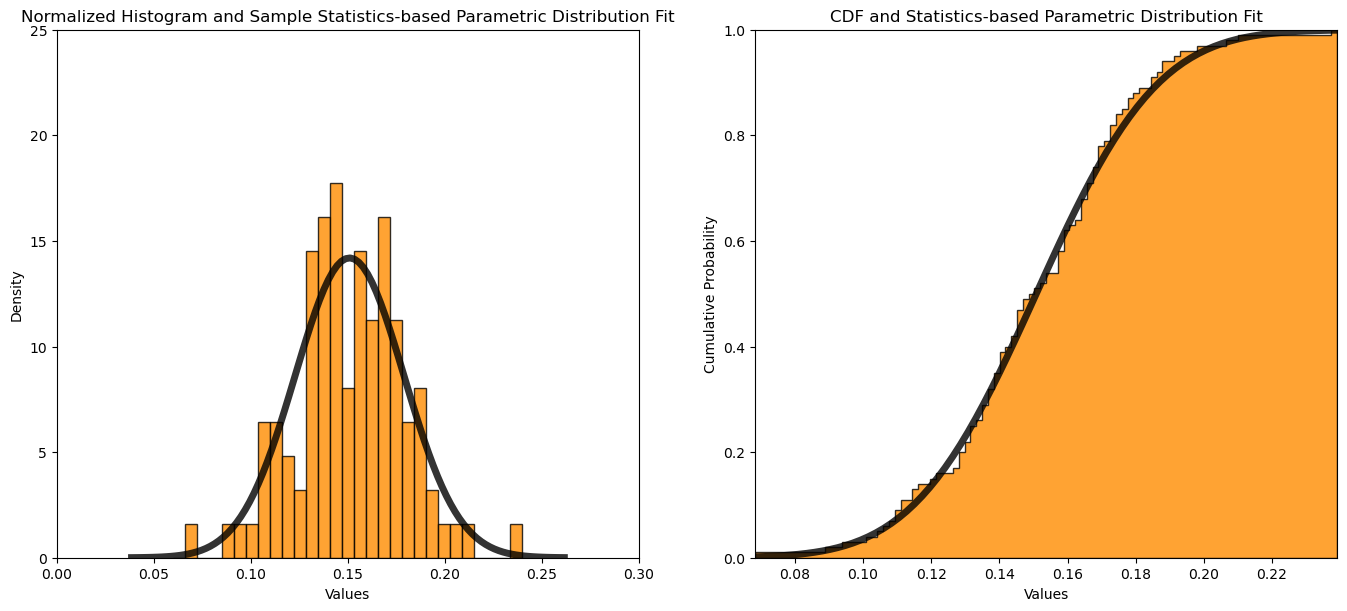

In [17]:
plt.subplot(1,2,1)                                        # plot the binned PDF
plt.hist(samples,bins = np.linspace(mean-3*stdev,mean+3*stdev,30), density = True, color = 'darkorange', edgecolor = 'black', alpha = 0.8)
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density'); plt.title('Normalized Histogram and Sample Statistics-based Parametric Distribution Fit')
 
x = np.linspace(my_dist.ppf(0.0001, loc = mean, scale = stdev),my_dist.ppf(0.9999, loc = mean, scale = stdev), 100)

mean = np.mean(samples); stdev = np.std(samples)

print('Sample data mean = ' + str(round(mean,3)) + ', MLE standard deviation = ' + str(round(stdev,3)))

plt.plot(x, my_dist.pdf(x, loc = mean, scale = stdev), 'black', lw=5, alpha=0.8, label='norm pdf')
plt.xlim(0.0,0.3); plt.ylim(0,25); plt.xlabel('Values'); plt.ylabel('Density')

plt.subplot(1,2,2)                                        # plot the binned PDF with the fit parametric distribution
plt.hist(samples, bins = len(samples), density = True, color = 'darkorange', edgecolor = 'black', cumulative = True, histtype = 'stepfilled',alpha = 0.8)
plt.xlim([np.min(samples),np.max(samples)]); plt.ylim(0,1); plt.xlabel('Values'); plt.ylabel('Cumulative Probability'); plt.title('CDF and Statistics-based Parametric Distribution Fit')
                                                                    
plt.plot(x, my_dist.cdf(x, loc = mean, scale = stdev), 'black', lw=5, alpha=0.8, label='norm pdf') # plot the CDF with the fit parametric distribution

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3)

There are many other parametric distributions that we could have included, but I have met my goal of providing a concise demonstration of distribution fitting. 

#### Comments

I hope you found this chapter helpful. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources),

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)